## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
book_data = pd.read_csv('Books.csv')
rating_data = pd.read_csv('Ratings.csv')
users_data = pd.read_csv('Users.csv')

In [3]:
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
rating_data.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


#### Number Of Rows And Columns 

In [6]:
print(f"Shape Of Books Data is : {book_data.shape}")

print(f"Shape Of Rating Data is : {rating_data.shape}")

print(f"Shape Of Users Data is : {users_data.shape}")

Shape Of Books Data is : (271360, 8)
Shape Of Rating Data is : (1149780, 3)
Shape Of Users Data is : (278858, 3)


#### Drop Unnecessary Features

In [7]:
book_data.drop(columns = ['Image-URL-S' , 'Image-URL-M' , 'Image-URL-L'] , inplace= True)

In [8]:
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


## Bulid Recommendation System Based on Popularty
______________________

#### Merge Rating Data With Book Data
____________

In [9]:
temp = rating_data.merge(book_data , on='ISBN')
temp.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#### How Many Users Rate Each Book

In [10]:
count_rating = temp.groupby('Book-Title' , as_index = False)['Book-Rating'].count().rename(columns = {'Book-Rating' : 'Count_Rate'})
count_rating.head()

,Book-Title,Count_Rate
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


#### Calculate The Average  Rate For Each book

In [11]:
Avg_Rate = temp.groupby('Book-Title' , as_index=False)['Book-Rating'].mean()
Avg_Rate.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


#### Merging The count Of Users That Rated And Average Of Rating For Each Book

In [12]:
popularty_data = count_rating.merge(Avg_Rate , on='Book-Title')
popularty_data.rename(columns = {'Book-Rating' : 'Avg_Rate'} , inplace=True)
popularty_data = popularty_data.sort_values(by = 'Avg_Rate' , ascending=False)


In [13]:
popularty_data

,Book-Title,Count_Rate,Avg_Rate
66223,Film Is: The International Free Cinema,1,10.0
123125,More Secrets of Happy Children: Embrace Your P...,1,10.0
96558,Jo's Boys : From the Original Publisher,1,10.0
212107,The Vanished Priestess : An Annie Szabo Mystery,1,10.0
72503,Game and Hunting,1,10.0
...,...,...,...
93628,Invaders of the Planet Earth (Choose Your Own ...,1,0.0
154021,Sammy Discovers the Alphabet (Learn-With-Sammy),1,0.0
154019,Sammy Carducci's Guide to Women,2,0.0
154018,Sammle mir Kiesel am FluÃ?Â?. Mehr als eine Li...,1,0.0


In [14]:
temp[temp['Book-Title']=='Film Is: The International Free Cinema']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
836485,86947,0879510722,10,Film Is: The International Free Cinema,Stephen Dwoskin,1985,Overlook Press


## Conclusion :-
There Are Many Books Have One User That Rated The Book And Its Rate Is 10

#### Filter On Books That Have Greater Than 250 Rating 

In [15]:
popularty_data = popularty_data[popularty_data['Count_Rate'] >=250]

print(f"shape pf popularty_data : {popularty_data.shape}")

popularty_data.head()

shape pf popularty_data : (186, 3)


,Book-Title,Count_Rate,Avg_Rate
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


#### Making Final Data 

In [16]:
Final_Data = popularty_data.merge(book_data , on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author',
                                                                            'Count_Rate', 'Avg_Rate']].reset_index(drop=True)

In [17]:
Final_Data

,Book-Title,Book-Author,Count_Rate,Avg_Rate
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.852804
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.824289
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.737410
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.501441
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.183453
...,...,...,...,...
181,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,265,2.245283
182,Whispers,BELVA PLAIN,286,2.199301
183,Presumed Innocent,Scott Turow,294,2.139456
184,Isle of Dogs,Patricia Cornwell,288,2.000000


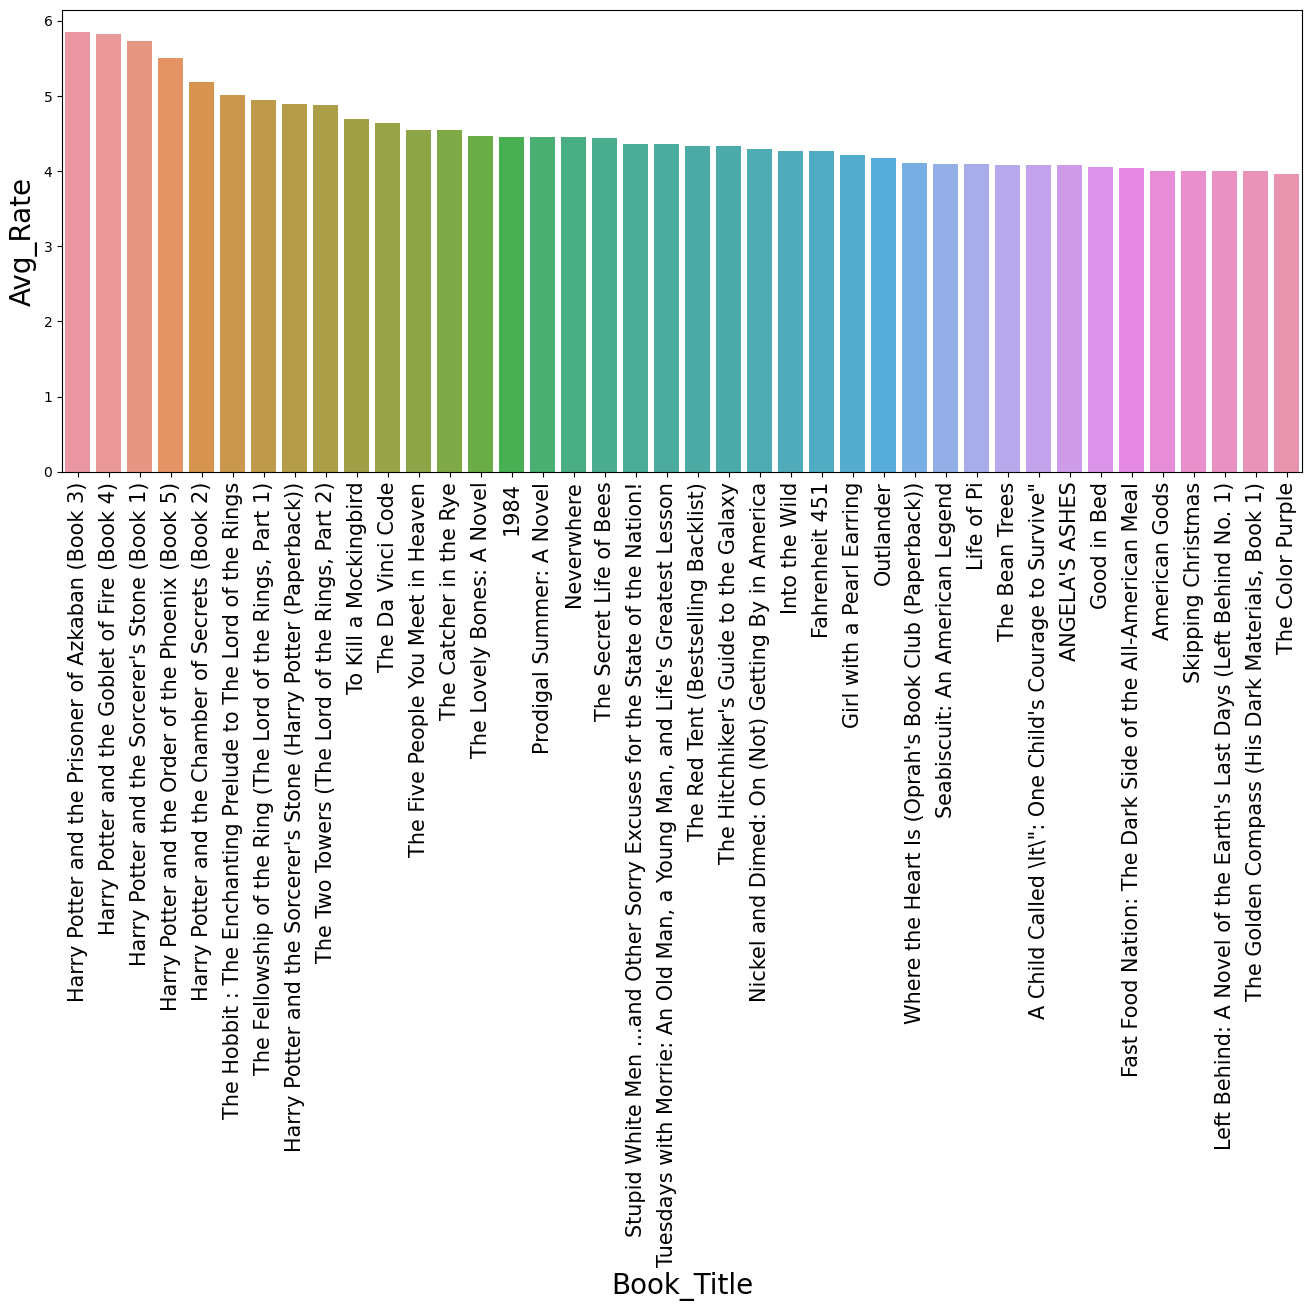

In [18]:
plt.figure(figsize=(16,6))
sns.barplot(x = Final_Data['Book-Title'].head(40) , y=Final_Data['Avg_Rate'].head(40))
plt.xticks(rotation = 'vertical' , size = 15)
plt.xlabel('Book_Title' , size = 20)
plt.ylabel('Avg_Rate' , size = 20)

plt.show()

## Collaborative filltreing system 

In [19]:
temp.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [20]:
## select the users who read more than 200 books 
x = temp.groupby('User-ID').count()['Book-Rating'] > 200

In [21]:
num_users = x[x].index

In [22]:
## Filter On Users who Read More Than 200 Books 
filter_data = temp[temp['User-ID'].isin(num_users)]
filter_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [23]:
## Most Famous 50 books Based On Users Who Read More Than 200 book
y = filter_data.groupby('Book-Title')['Book-Rating'].count()>=50

In [24]:
famous_books = y[y].index

In [25]:
## Filter on Most Famous 50 books 
filter_data = filter_data[filter_data['Book-Title'].isin(famous_books)]
filter_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books


In [26]:
## Making The Matrix Contain The Items Users And Thier Prefrances 
pivot = filter_data.pivot_table(index='Book-Title' , columns='User-ID' , values = 'Book-Rating').fillna(0)

In [27]:
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
## groping based on similar prefrances 
similar_score = cosine_similarity(pivot)

In [29]:
## How much item Number 4 similar to nearest 6 items 
sorted(list(enumerate(similar_score[4])), key = lambda x :x[1],reverse=True)[:6]

[(4, 1.0),
 (24, 0.29562611831779734),
 (564, 0.29142141649839076),
 (418, 0.26043350404519483),
 (43, 0.25099279007642467),
 (186, 0.24631687323985016)]

In [30]:
def recommender(book_name):
    
    ## thats how we can get the index of item
    index = np.where(pivot.index == book_name)[0][0]
    ## Most similar item 
    similar_item = sorted(list(enumerate(similar_score[index])) , key = lambda x : x[1] , reverse = True)[:6]
    
    ## tp print the name of items
    for i in similar_item:
        print(pivot.index[i[0]])

In [32]:
recommender('1984')

1984
Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
